# Homework set 1

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 7, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Christos Perchanidis    (14601206)

River Vaudrin           (11877154)

Run the following cell to import the necessary packages.

In [60]:
import numpy as np
import matplotlib.pyplot as plt

## NumPy in single-precision floating point numbers
Working with real numbers on a computer can sometimes be counter-intuitive. Not every real number cannot be represented exactly, because that would require an infinite amount of memory. Real numbers are in Python represented as "double-precision floating point numbers" that approximate the real numbers they represent. As such, the usual "rules of mathematics" no longer hold for very small or very large numbers:

In [61]:
print("very small numbers:")
print(1 - 1)          # Should be zero
print(1 - 1 + 1e-17)  # Should be 10 ** -17, i.e. a very small number
print(1 + 1e-17 - 1)  # Should *also* be 10**-17, but is it?

print("very large numbers:")
print(2.0**53)        # Some very large number
print(2.0**53 + 1.0)  # Some very large number + 1

very small numbers:
0
1e-17
0.0
very large numbers:
9007199254740992.0
9007199254740992.0


Usually, you don't have to worry about these rounding errors. But in scientific computing, these rounding errors sometimes become important. To reveal this problem more directly, we can decrease the precision of these approximations, using "single precision" instead of double precision floating point numbers, by employing `np.single`:

In [62]:
print(1.0 + 10**-9)             # Should be slightly above 1
print(np.single(1.0 + 10**-9))  # But in single precision, it is exactly 1.

1.000000001
1.0


Today we will practice with these single-precision floating point numbers. One thing to keep in mind is that Python will *really* try to work with double-precision floats:

In [63]:
a = 5.0
b = np.single(5.0)
print("a and b represent the same value:", a == b)
print("but they are of different types:", type(a), type(b))
print("If I add zero to a, its type does not change: ", type(a) == type(a + 0.0))
print("If I add zero to b, its type *does* change:   ", type(b) == type(b + 0.0))

a and b represent the same value: True
but they are of different types: <class 'float'> <class 'numpy.float32'>
If I add zero to a, its type does not change:  True
If I add zero to b, its type *does* change:    False


Any time Python encounters a number like `1` or `0` or `math.pi`, it will interpret this as double precision, unless you use `np.single`. 

So we have to be extra careful when working with these single-precision numbers, to prevent these types changing. See the difference between `S` and `T` below.

In [64]:
S = 0.0
S += np.single(5.0)
print(type(S))

T = np.single(0.0)
T += np.single(5.0)
print(type(T))

<class 'numpy.float64'>
<class 'numpy.float32'>


## Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


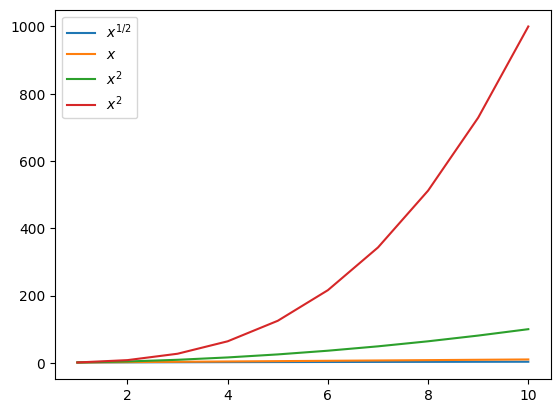

In [65]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

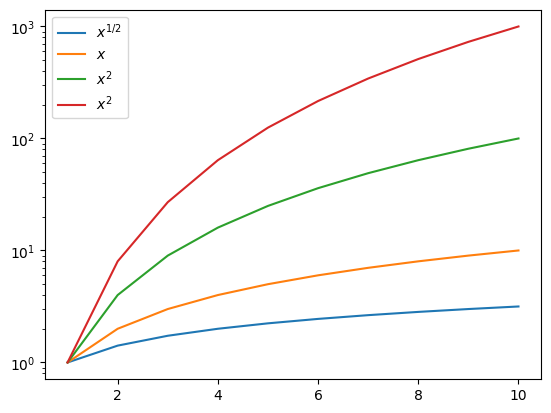

In [66]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


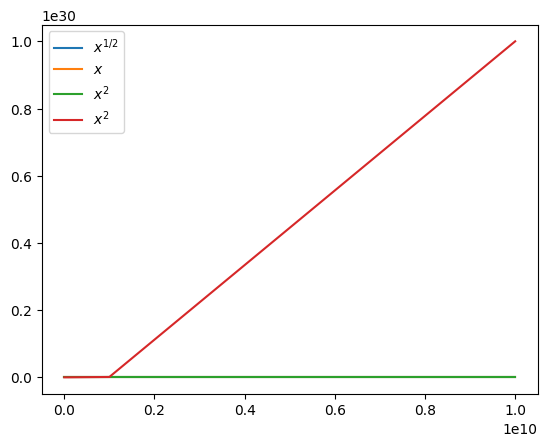

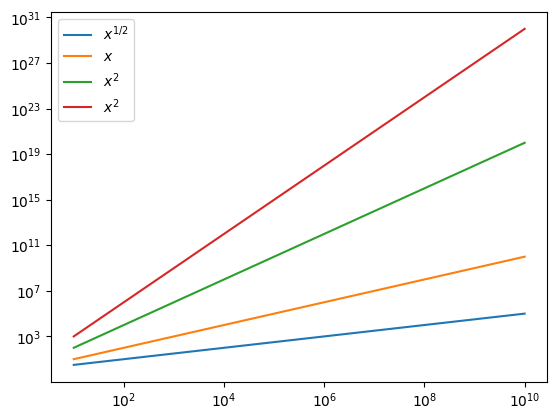

In [67]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

-----
# Exercise 1
This exercise is a variant of exercise 1.6 in the book.

## (a) 
Lookup the Taylor series for $\cos(x)$ in the base point $0$. (You don't have to hand in the series expansion)

## (b) (0.5 pt)
What are the forward and backward errors if we approximate $\cos(x)$ by the first **two** nonzero terms in the Taylor series at $x = 0.2$, $x = 1.0$ and $x = 2.0$?

**Answer:**

The Taylor series for $\cos(x)$ in the base point $0$ is:

$$y = f(x) = \cos (x)=1-\frac{x^2}{2 !}+\frac{x^4}{4 !}-\frac{x^6}{6 !}+\cdots$$

The approximation for $\cos(x)$ given by the first two nonzero terms of the Taylor series is:

$$\hat{y}=\hat{f}(x)=1-\frac{x^2}{2 !}+\frac{x^4}{4 !}$$

Thus the forward error in this approximation is then given by:

$$\Delta y=\hat{y}-y=\hat{f}(x)-f(x)=1-\frac{x^2}{2 !}+\frac{x^4}{4 !}-\cos (x)$$

In the case of $x = 0.2$, $x = 1.0$ and $x = 2.0$ the **forward error** would be (calculations were done in cell below):
- for $x=0.2$: $\Delta y \approx 8.882542501531532e-08$
- for $x = 1.0$: $\Delta y \approx 0.0013643607985268646$
- for $x = 2.0$: $\Delta y \approx 0.08281350321380904$

To determine the backward error, we must find the input value $\hat{x}$ for $f$ that gives the output value $\hat{y}$ (that we have obtained), that is, for which $\hat{f}(x) = f(\hat{x})$. For the cosine function this value is given by:

$$\hat{x}=\arccos (\hat{f}(x))=\arccos (\hat{y})$$

Thus for $x = 0.2$, $x = 1.0$ and $x = 2.0$:
- for $x=0.2$: $\hat{x} = \arccos(\hat{y}) = \arccos(\sim 0.9800666666666666) \approx 0.19999955289765858$
- for $x = 1.0$: $\hat{x} = \arccos(\hat{y}) = \arccos(\sim 0.5416666666666666) \approx 0.9983777547020765$
- for $x = 2.0$: $\hat{x} = \arccos(\hat{y}) = \arccos(\sim -0.33333333333333337) \approx 1.9106332362490186$

Now we can compute the **backward error**, $\Delta x = \hat{x} - x$, which is:
- for $x=0.2$: $\Delta x \approx -4.4710234142764094e-07$
- for $x = 1.0$: $\Delta x \approx -0.0016222452979235413$
- for $x = 2.0$: $\Delta x \approx -0.0893667637509814$


In [69]:
x=[0.2, 1.0, 2.0]
y_hats = []
# calculate forward error
print("Forward Errors approx. Cos(x) for {}:".format(x))
for x_i in x:
    y_hat = 1 - (x_i**2/np.math.factorial(2)) + (x_i**4/np.math.factorial(4))
    y_hats.append(y_hat)
    y = np.cos(x_i)
    print(y_hat - y)

# calculate borward error
print("\nBackward Errors approx. Cos(x) for {}:".format(x))
for x_i, y_hat_i in zip(x, y_hats):
    x_hat = np.arccos(y_hat_i)
    print(x_hat - x_i)

Forward Errors approx. Cos(x) for [0.2, 1.0, 2.0]:
8.882542501531532e-08
0.0013643607985268646
0.08281350321380904

Backward Errors approx. Cos(x) for [0.2, 1.0, 2.0]:
-4.4710234142764094e-07
-0.0016222452979235413
-0.0893667637509814


## (c) (0.5 pt)
What are the forward and backward errors if we approximate $\cos(x)$ by the first **three** nonzero terms in the Taylor series at $x = 0.2$, $x = 1.0$ and $x = 2.0$?

**Answer:**

The Taylor series for $\cos(x)$ in the base point $0$ is:

$$y = f(x) = \cos (x)=1-\frac{x^2}{2 !}+\frac{x^4}{4 !}-\frac{x^6}{6 !}+\cdots$$

The approximation for $\cos(x)$ given by the first three nonzero terms of the Taylor series is:

$$\hat{y}=\hat{f}(x)=1-\frac{x^2}{2 !}+\frac{x^4}{4 !}-\frac{x^6}{6 !}$$

Thus the forward error in this approximation is then given by:

$$\Delta y=\hat{y}-y=\hat{f}(x)-f(x)=1-\frac{x^2}{2 !}+\frac{x^4}{4 !}-\frac{x^6}{6 !}-\cos (x)$$

In the case of $x = 0.2$, $x = 1.0$ and $x = 2.0$ the **forward error** would be (calculations were done in cell below):
- for $x=0.2$: $\Delta y \approx -6.346390080125275e-11$
- for $x = 1.0$: $\Delta y \approx -2.4528090362019306e-05$
- for $x = 2.0$: $\Delta y \approx -0.00607538567507987$

To determine the backward error, we must find the input value $\hat{x}$ for $f$ that gives the output value $\hat{y}$ (that we have obtained), that is, for which $\hat{f}(x) = f(\hat{x})$. For the cosine function this value is given by:

$$\hat{x}=\arccos (\hat{f}(x))=\arccos (\hat{y})$$

Thus for $x = 0.2$, $x = 1.0$ and $x = 2.0$:
- for $x=0.2$: $\hat{x} = \arccos(\hat{y}) = \arccos(\sim 0.9800665777777777) \approx 0.2000000003194449$
- for $x = 1.0$: $\hat{x} = \arccos(\hat{y}) = \arccos(\sim 0.5402777777777777) \approx 1.0000291487897668$
- for $x = 2.0$: $\hat{x} = \arccos(\hat{y}) = \arccos(\sim -0.4222222222222223) \approx 2.006691703032119$

Now we can compute the **backward error**, $\Delta x = \hat{x} - x$, which is:
- for $x=0.2$: $\Delta x \approx 3.194448872090305e-10$
- for $x = 1.0$: $\Delta x \approx 2.9148789766786365e-05$
- for $x = 2.0$: $\Delta x \approx 0.0066917030321191895$

In [71]:
x=[0.2, 1.0, 2.0]
y_hats = []
# calculate forward error
print("Forward Errors approx. Cos(x) for {}:".format(x))
for x_i in x:
    y = np.cos(x_i)
    y_hat = 1 - (x_i**2/np.math.factorial(2)) + (x_i**4/np.math.factorial(4)) - (x_i**6/np.math.factorial(6))
    y_hats.append(y_hat)
    print(y_hat - y)

# calculate backward error
print("\nBackward Errors approx. Cos(x) for {}:".format(x))
for x_i, y_hat_i in zip(x, y_hats):
    x_hat = np.arccos(y_hat_i)
    print(x_hat - x_i)

Forward Errors approx. Cos(x) for [0.2, 1.0, 2.0]:
-6.346390080125275e-11
-2.4528090362019306e-05
-0.00607538567507987

Backward Errors approx. Cos(x) for [0.2, 1.0, 2.0]:
3.194448872090305e-10
2.9148789766786365e-05
0.0066917030321191895


## (d) (1 pt)
Compute the relative condition of $x \mapsto \cos(x)$ at $x = 0.2$, $x=1.0$ and $x=2.0$.

**Answer:**

The formula for condition number is:
$$\text { Condition number } \approx\left|\frac{y g^{\prime}(y)}{g(y)}\right|=\left|\frac{f(x)\left(1 / f^{\prime}(x)\right)}{x}\right| = \left|\frac{f(x)}{x f^{\prime}(x)}\right|$$

Substitute with these: $f(x)=\cos(x)$, $f^{\prime}(x)=-\sin(x)$
$$\left|\frac{f(x)}{x f^{\prime}(x)}\right| = \left|\frac{\cos(x)}{-x\sin(x)}\right|$$

Now we can input $x = 0.2$, $x=1.0$ and $x=2.0$, and obtain:
- for $x = 0.2$: $\text { Condition number } \approx 24.665774377934465$
- for $x=1.0$: $\text { Condition number } \approx 0.6420926159343308$
- for $x=2.0$: $\text { Condition number } \approx 0.22882877718014288$

The max condition number is $\sim 24.67$ when input $x=0.2$, thus this problem can be considered a sensitive problem as this is a large number.

In [90]:
x=[0.2, 1.0, 2.0]

for x_i in x:
    cond_num = np.abs(np.cos(x_i)/(x_i*-np.sin(x_i)))
    print(cond_num)

24.665774377934465
0.6420926159343308
0.22882877718014288


# Exercise 2

This exercise is about computing the sum of a set of $n$ random numbers. You are asked to implement different ways to compute the sum. To be able to compare rounding errors for the different methods, all sums have to be executed in single precision (some hints are above), and implemented by yourself, unless specifically mentioned. The result of each sum can then be compared with a reference implementation that employs the standard double precision format.

Vary $n$ by choosing different powers of 10 at least up to, say, $10^7$.

## (a)
Create a function that returns an array of $n$ single precision random numbers (here denoted by $x_1$, $i=1, \ldots, n$), uniformly distributed in the interval $[0,1]$. You may use a suitable function from `numpy.random`.

Create a function to sum the numbers using double precision computations in the order they are generated. 

In [72]:
# Function for generating random array
def gen_rand_sing_prec(n):
    np.random.seed(42)  # Used seed to work with the same array always
    numbers = np.random.random_sample((n,)).astype('f') # Return a sample from uniform normal distribution as a single precision float
    return numbers

# Function for sequential double precision summation
def summation_double_prec(n):
    sum = 0.0
    for n_i in n:
        sum += n_i
    return sum

## (b) (a+b together 2 pts)
Create a function to sum the numbers in the order in which they were generated, this time using single-precision computations. Visualize the errors as a function of $n$ using a log-log plot.

In [73]:
# Function for sequential single precision summation
def summation_single_prec(n):
    sum = np.single(0.0)
    for n_i in n:
        sum += n_i
    return sum

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


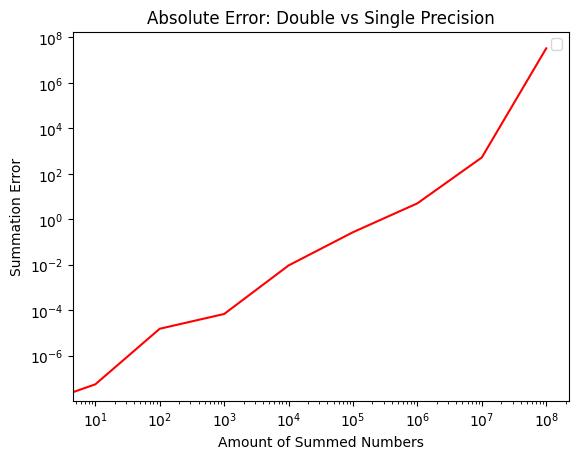

In [78]:
# Amount of numbers to generate
n_max = 9   # 10^8
rand_arr = gen_rand_sing_prec(10**n_max)
# Creating sizes for sub-arrays to calculate the sum
n_values = np.zeros(n_max)
for n in range(1, n_max):
    n_values[n] = 10**n

# Summation
sum_single = np.zeros(n_max)
sum_double = np.zeros(n_max)
for n in range(1, n_max):
    sum_single[n] = (summation_single_prec(rand_arr[:int(n_values[n])]))
    sum_double[n] = (summation_double_prec(rand_arr[:int(n_values[n])]))
diff_point = np.abs(np.subtract(sum_double, sum_single))    # Finding the absolute difference

# Visualizing the difference
plt.loglog(n_values, diff_point, color='red')
plt.title("Absolute Error: Double vs Single Precision")
plt.xlabel('Amount of Summed Numbers')
plt.ylabel('Summation Error')
plt.legend()
plt.show()

## (c) (1.5 pts)
Use the following compensated summation algorithm (due to Kahan), again using only single precision, to sum the numbers in the order in which they were generated:

<img src="Kahan_alg.png"
     width=200>
 
(algorithm at https://canvas.uva.nl/files/7499123/download?download_frd=1)

Plot the error as a function of $n$.

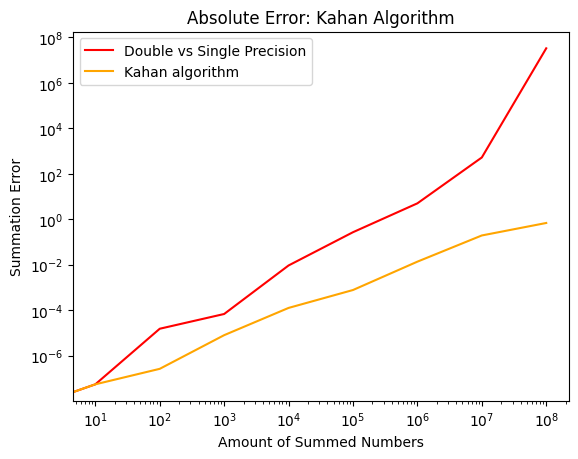

In [79]:
# Function for sequential single precision compensated summation due to Kahan
def summation_single_prec_kahan(n):
    sum = np.single(n[0])
    c = np.single(0)
    for n_i in range(1, len(n)):
        y = n[n_i] - c
        t = sum + np.single(y)
        c = (t - sum) - np.single(y)
        sum = t
    return sum

# Summation due to Kahan
sum_single_kahan = np.zeros(n_max)
for n in range(1, n_max):
    sum_single_kahan[n] = (summation_single_prec_kahan(rand_arr[:int(n_values[n])]))
diff_point_kahan = np.abs(np.subtract(sum_double, sum_single_kahan))    # Finding the absolute difference

# Visualizing the difference between Kahan and Simple summations
plt.loglog(n_values, diff_point, color='red', label=r"Double vs Single Precision")
plt.loglog(n_values, diff_point_kahan, color='green', label=r"Kahan algorithm")
plt.title("Absolute Error: Kahan Algorithm")
plt.xlabel('Amount of Summed Numbers')
plt.ylabel('Summation Error')
plt.legend()
plt.show()

## (d) (1.5 pts)
Sum the numbers in increasing order of magnitude and plot the error. Sum the numbers in decreasing order of magnitude and plot the error. You may use a `sort` function from NumPy or some other package. (You don't need to use the Kahan sums here.)

In [80]:
# Sorting Arrays
rand_arr_sorted = np.sort(rand_arr)
rand_arr_asc = rand_arr_sorted
rand_arr_des = rand_arr_sorted[::-1]

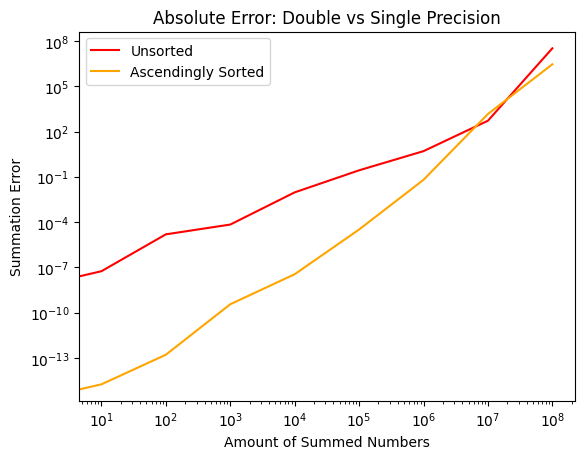

In [81]:
# Calculations with Ascending Array

# Summation
sum_single_asc = np.zeros(n_max)
sum_double_asc = np.zeros(n_max)
for n in range(1, n_max):
    sum_single_asc[n] = (summation_single_prec(rand_arr_asc[:int(n_values[n])]))
    sum_double_asc[n] = (summation_double_prec(rand_arr_asc[:int(n_values[n])]))
diff_point_asc = np.abs(np.subtract(sum_double_asc, sum_single_asc))    # Finding the absolute difference

# Visualizing the difference between Double and Simple summations in Ascending order
# Note: We can see how error increases slowly, and becomes significant once numbers are getting bigger
plt.loglog(n_values, diff_point, color='red', label=r"Unsorted")
plt.loglog(n_values, diff_point_asc, color='orange', label=r"Ascendingly Sorted")
plt.title("Absolute Error: Double vs Single Precision")
plt.xlabel('Amount of Summed Numbers')
plt.ylabel('Summation Error')
plt.legend()
plt.show()

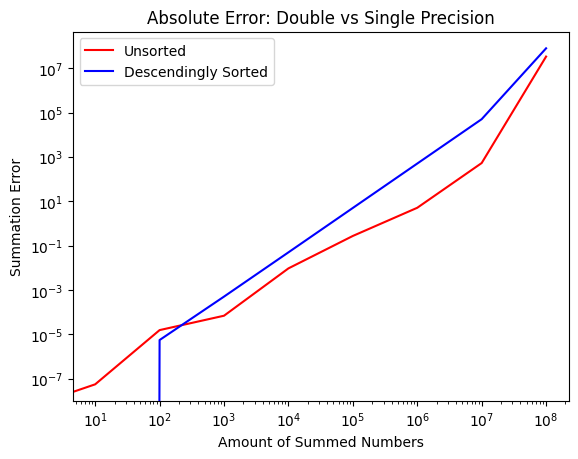

In [82]:
# Calculations with Descending Array

# Summation
sum_single_des = np.zeros(n_max)
sum_double_des = np.zeros(n_max)
for n in range(1, n_max):
    sum_single_des[n] = (summation_single_prec(rand_arr_des[:int(n_values[n])]))
    sum_double_des[n] = (summation_double_prec(rand_arr_des[:int(n_values[n])]))
diff_point_des = np.abs(np.subtract(sum_double_des, sum_single_des))    # Finding the absolute difference

# Visualizing the difference between Double and Simple summations in Descending order
# Note: We can see how error is zero at the beginning as we add ones, where precision does not matter
#       once we get to numbers which are close to 1 but are less then 1 the difference in precision grows drastically
plt.loglog(n_values, diff_point, color='red', label=r"Unsorted")
plt.loglog(n_values, diff_point_des, color='blue', label=r"Descendingly Sorted")
plt.title("Absolute Error: Double vs Single Precision")
plt.xlabel('Amount of Summed Numbers')
plt.ylabel('Summation Error')
plt.legend()
plt.show()

## (e) (2 pts)
How do the methods rank in terms of accuracy? Can you explain the differences? Can you explain why the method of Kahan works? 
N.B.1 be precise in your explanations. Try to explain the size of any errors that are not incurred as well as of errors that are encurred.
N.B.2 you are required to formulate an answer in text. You may also add computations if you feel this helps in the explanations.

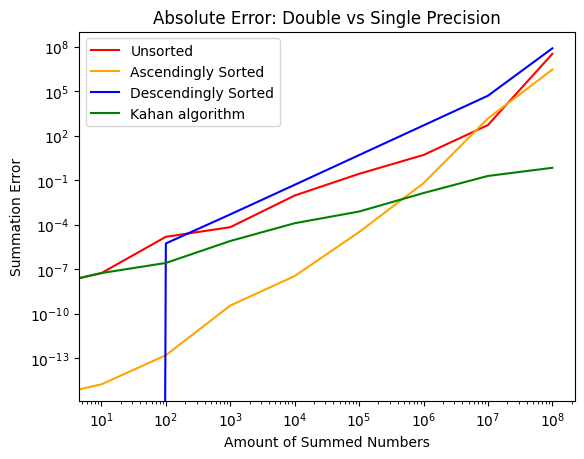

In [93]:
plt.loglog(n_values, diff_point, color='red', label=r"Unsorted")
plt.loglog(n_values, diff_point_asc, color='orange', label=r"Ascendingly Sorted")
plt.loglog(n_values, diff_point_des, color='blue', label=r"Descendingly Sorted")
plt.loglog(n_values, diff_point_kahan, color='green', label=r"Kahan algorithm")
plt.title("Absolute Error: Double vs Single Precision")
plt.xlabel('Amount of Summed Numbers')
plt.ylabel('Summation Error')
plt.legend()
plt.show()

**Answer:**

As we can see from the graph in terms of accuracy, the best methods are the Ascending Sorted and the Kahan algorithm, also known as Compensated Summation. However, the ascending sorted method clearly has a higher slope and worse final results than Kahan’s algorithm.

This is happening because, the ascending sorted method hides its error in the beginning. While initial values are small and do not have a big difference between them, their sum also has a small error. This helps to minimize an error on the graph, as the error’s absolute value is small in the beginning. However, as numbers become larger, we can see how error grows fast.

Whereas, the Kahan’s algorithm outperforms other summations. It is called Compensated Summation because it adds a term to compensate for the lost precision during summation. In a nutshell, we have one more mantissa from single precision float to correct the error during summation. It is achieved by carrying an error during calculation and adding or subtracting it from the incoming number in summation.  Afterwards we find a sum, and extract an occurred error by subtraction the old sum’s value from the new one and subtracting the added term. We continue this process until terms to add end.

Something worth mentioning is the behavior exhibited by the descending sorted method, here, we can see that the error is zero for the first amount of summed numbers. This is happening because at the beginning only 1.0s are being added to each other, here precision does not matter much. Once we get to the numbers which are close, but less than 1.0, the computational error grows drastically.

We should also mention that double precision summation (with which we are comparing single precision summation) also is not absolutely correct, as it still has a finite precision. Thus, absolute error is higher, as any computation with finite precision have a truncation error.